# YOLO(You Only Look Once)

#### 객체 감지 (yolov8l.pt, yolov8m.pt, yolov8n.pt, yolov8s.pt, yolov8x.pt, yolov8x6.pt)
#### 분할 (yolov8l-seg.pt, yolov8m-seg.pt, yolov8n-seg.pt, yolov8s-seg.pt, yolov8x-seg.pt)
#### 분류 (yolov8l-cls.pt, yolov8m-cls.pt, yolov8n-cls.pt, yolov8s-cls.pt, yolov8x-cls.pt)

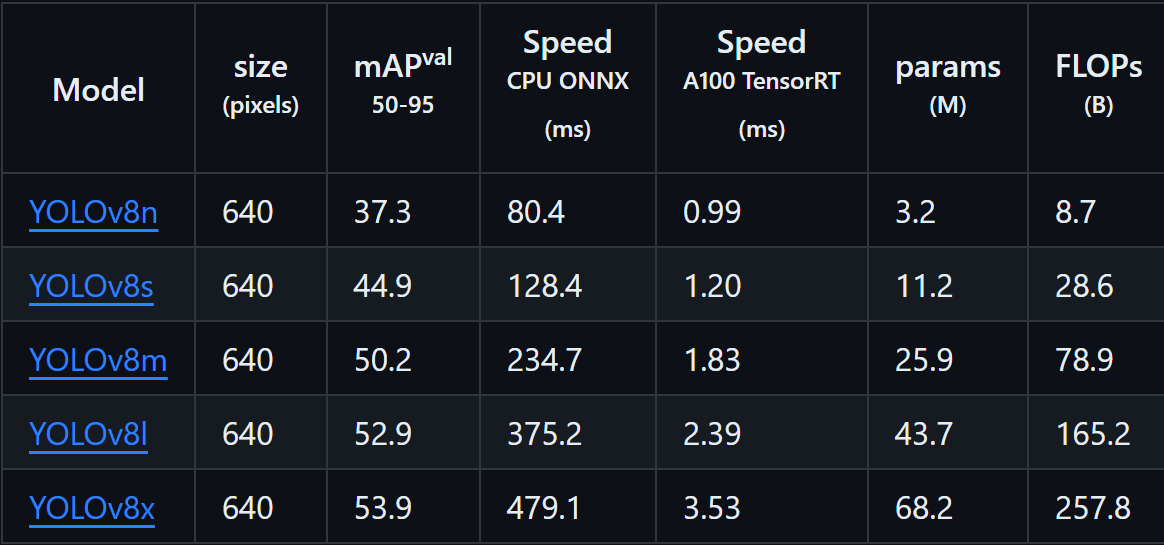

* 'n' 모델 이미지 객체인식에 약 40~50[ms]가 소요 된다.
* 'x' 모델 이미지 객체인식에 약 300~400[ms]가 소요된다.

# CLI 기본 사용법
* yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

* 이미지에서 객체 탐지
    - yolo predict model=yolov8n.pt source='image.jpg'
* 비디오에서 객체 탐지
    - yolo predict model=yolov8n.pt source='video.mp4'
* 웹캠을 사용하여 실시간 객체 탐지
 - yolo predict model=yolov8n.pt source=0 show=True

1. 여러 이미지 파일을 받아 드라이브에 업로드
2. 모델을 구축
3. 업로드된 이미지 파일 모델 적용

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 7.9 MB/s eta 0:00:00


In [2]:
from google.colab import files
import os
import shutil

# 파일 업로드
uploaded = files.upload()

# 업로드된 파일이 들어갈 폴더 생성
folder_name = 'upload_images'
os.makedirs(folder_name, exist_ok=True)

# 업로드된 파일을 폴더로 이동
for filename in uploaded.keys():
    src_path = filename
    dest_path = os.path.join(folder_name, filename)
    shutil.move(src_path, dest_path)

# 폴더 안의 파일 목록 출력
print(f'Files moved to folder {folder_name}: {os.listdir(folder_name)}')

Saving 거리.jpg to 거리.jpg
Saving 거실.jpg to 거실.jpg
Saving 교실.jpg to 교실.jpg
Saving 길거리.jpg to 길거리.jpg
Saving 도로.jpg to 도로.jpg
Saving 사무실.jpg to 사무실.jpg
Saving 옷가게.jpg to 옷가게.jpg
Saving 책상.jpg to 책상.jpg
Saving 카페.jpg to 카페.jpg
Files moved to folder upload_images: ['길거리.jpg', '카페.jpg', '거실.jpg', '책상.jpg', '도로.jpg', '거리.jpg', '사무실.jpg', '교실.jpg', '옷가게.jpg']


In [3]:
import ultralytics
from ultralytics import YOLO

import warnings
warnings.filterwarnings('ignore')

In [5]:
from ultralytics import YOLO

# 모델 불러오기
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')  # 사전 훈련된 모델
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # 가중치 전송

# 모델 학습
result = model.train(data='coco128.yaml', epochs=100, imgsz=320)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.66M/6.66M [00:00<00:00, 79.4MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 3366.73file/s]

Dataset download success ✅ (1.7s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 21.8MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1222.05it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G       1.37      2.424      1.293        281        320: 100%|██████████| 8/8 [00:36<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.36s/it]

                   all        128        929      0.664      0.431      0.506      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.493      2.539      1.369        251        320: 100%|██████████| 8/8 [00:36<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.33s/it]

                   all        128        929      0.661      0.446       0.52      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.364      2.384      1.281        147        320:  88%|████████▊ | 7/8 [00:27<00:03,  3.88s/it]


KeyboardInterrupt: ignored

In [45]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
# # 학습 시킨 모델 가중치 저장
# torch.save(model.state_dict(), 'yolo_weights.pth')
# # 학습 시킨 모델 저장
# torch.save(model, 'yolo_model.pth')

# # 모델 아키텍처만 불러오기
# model = torch.load('yolo_model.pth')

# # 모델 가중치만 불러오기 (모델 아키텍처는 미리 정의되어 있어야 함)
# model = YOLO()  # 예시로 YOLO 클래스의 인스턴스 생성
# model.load_state_dict(torch.load('yolo_weights.pth'))

In [46]:
from ultralytics import YOLO

# pre_trained model 불러오기 or 파인튜닝한 모델 불러오기
# 파인 튜닝까지 시간이 생기면 도전
model = YOLO('yolov8n.pt')

# 예측 실행
want_images = '/content/upload_images'
results = model.predict(want_images,task = 'detect',save = True)  # 이미지에 대한 예측 실행


image 1/9 /content/upload_images/거리.jpg: 640x480 6 cars, 1 clock, 17.7ms
image 2/9 /content/upload_images/거실.jpg: 640x640 3 couchs, 2 dining tables, 14.5ms
image 3/9 /content/upload_images/교실.jpg: 480x640 7 chairs, 1 dining table, 1 tv, 125.1ms
image 4/9 /content/upload_images/길거리.jpg: 640x448 2 persons, 6 cars, 1 motorcycle, 1 stop sign, 110.5ms
image 5/9 /content/upload_images/도로.jpg: 480x640 13 persons, 6 cars, 2 motorcycles, 16.3ms
image 6/9 /content/upload_images/사무실.jpg: 384x640 8 chairs, 1 dining table, 111.3ms
image 7/9 /content/upload_images/옷가게.jpg: 640x640 1 person, 1 cat, 12.3ms
image 8/9 /content/upload_images/책상.jpg: 640x608 2 knifes, 1 mouse, 1 keyboard, 106.7ms
image 9/9 /content/upload_images/카페.jpg: 640x480 10 chairs, 1 dining table, 1 vase, 12.6ms
Speed: 3.2ms preprocess, 58.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3


In [ ]:
for result in results.xyxy[0]:
    # 추출된 클래스 정보와 확률
    label = int(result['label'])
    confidence = float(result['confidence'])

    # 클래스 이름과 확률 출력
    class_name = classes[label]  # classes는 미리 정의된 클래스 이름의 리스트
    print(f'Class: {class_name}, Confidence: {confidence:.2f}')

In [47]:
import numpy as np

# 결과 출력
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

In [48]:
from glob import glob

In [49]:
test_img = glob('/content/upload_images/*')

In [50]:
len(test_img)

9

In [51]:
test_img.sort()

In [ ]:
for result in results.xyxy[0]:
    # 추출된 클래스 정보와 확률
    label = int(result['label'])
    confidence = float(result['confidence'])

    # 클래스 이름과 확률 출력 (클래스 이름은 모델이 어떤 클래스를 사용하는지에 따라 다를 수 있음)
    class_name = classes[label]  # classes는 미리 정의된 클래스 이름의 리스트일 것입니다.
    print(f'Class: {class_name}, Confidence: {confidence:.2f}')


In [16]:
# 검증
# 모델 불러오기
model = YOLO('yolov8n-cls.pt')
model = YOLO('/content/runs/classify/train/weights/best.pt')  # 사용자 모델 불러오기

# 모델 검증
metrics = model.val()  # 추가 인자 불필요, 데이터셋 및 설정 기억함
metrics.top1   # top1 정확도
metrics.top5   # top5 정확도

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-cls summary (fused): 133 layers, 56136010 parameters, 0 gradients, 153.8 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 


TypeError: ignored

In [18]:
import zipfile
import os

zip_filename = 'images.zip'

# 압축 해제할 경로
extract_path = '/content/extracted/'

# zip 파일 압축 해제
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 압축 해제된 파일 확인
extracted_files = os.listdir(extract_path)
print(f'Extracted files: {extracted_files}')

FileNotFoundError: ignored

In [ ]:
import cv2
import os
from ultralytics import YOLO

def predict_objects_in_folder(model_path, folder_path):
    # YOLO 모델 불러오기
    model = YOLO(model_path)

    # 폴더 내 이미지 파일 목록 가져오기
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    predictions = []

    # 각 이미지 파일에 대해 객체 탐지 수행
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)

        # 이미지 읽기
        image = cv2.imread(image_path)
        height, width, _ = image.shape

        # YOLO에 입력할 형식으로 변환
        blob = cv2.dnn.blobFromImage(image, 1/255.0, (640, 640), swapRB=True, crop=False)
        model.net.setInput(blob)

        # YOLO 추론 수행
        outs = model.net.forward(model.layer_names)

        # 결과를 리스트에 추가
        predictions.append({
            'image_path': image_path,
            'predictions': []
        })

        # 각 객체에 대한 정보 추출 및 리스트에 추가
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = int(np.argmax(scores))
                confidence = float(scores[class_id])

                if confidence > 0.5:
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    predictions[-1]['predictions'].append({
                        'class_id': class_id,
                        'confidence': confidence,
                        'bbox': (x, y, w, h)
                    })

    return predictions

# 사용 예시
model_path = 'path/to/your/yolov8n-cls.pt'
folder_path = 'path/to/your/folder'
results = predict_objects_in_folder(model_path, folder_path)

# 결과 출력
for result in results:
    print(f"Image: {result['image_path']}")
    for prediction in result['predictions']:
        print(f"  Class ID: {prediction['class_id']}, Confidence: {prediction['confidence']:.2f}, Bbox: {prediction['bbox']}")


In [11]:
import cv2
import numpy as np
import os

# YOLO 모델 로드
net = cv2.dnn.readNet(model3, 'yolov5.weights')

# YOLO 모델 설정
layer_names = net.getUnconnectedOutLayersNames()
colors = np.random.uniform(0, 255, size=(len(layer_names), 3))

# 이미지가 담긴 폴더 경로
folder_path = 'C:/Users/user/Desktop/images'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# 각 이미지 파일에 대해 객체 탐지 수행
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)

    # 이미지 읽기
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # YOLO에 입력할 형식으로 변환
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # YOLO 추론 수행
    outs = net.forward(layer_names)

    # 각 객체에 대한 정보 추출 및 화면에 표시
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                color = colors[class_id]
                cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
                cv2.putText(image, f'Class: {class_id}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # 결과 이미지 표시
    cv2.imshow('YOLO Image', image)
    cv2.waitKey(0)

cv2.destroyAllWindows()


error: ignored

In [ ]:
data = {
    'train': '/content/Aquarium_Data/train/images',
    'test': '/content/Aquarium_Data/test/images',
    'val': '/content/Aquarium_Data/valid/images',
    'nc':7,
    'names': ['fish','jellyfish','penguin','puffin','shark','starfish','stingray']
}

In [ ]:
import yaml
with open('/content/Aquarium_Data/Aquarium_data.yaml','w') as f:
    yaml.dump(data, f)

In [ ]:
with open('/content/Aquarium_Data/Aquarium_data.yaml', 'r') as f:
    aquarium_yaml = yaml.safe_load(f)
    display(aquarium_yaml)

{'names': ['fish',
  'jellyfish',
  'penguin',
  'puffin',
  'shark',
  'starfish',
  'stingray'],
 'nc': 7,
 'test': '/content/Aquarium_Data/test/images',
 'train': '/content/Aquarium_Data/train/images',
 'val': '/content/Aquarium_Data/valid/images'}

In [ ]:
model.train(data='/content/Aquarium_Data/Aquarium_data.yaml', epochs = 10, patience =5, batch = 32, imgsz = 416)

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x6.pt, data=/content/Aquarium_Data/Aquarium_data.yaml, epochs=10, patience=5, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

100%|██████████| 755k/755k [00:00<00:00, 19.5MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 107MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[416] must be multiple of max stride 64, updating to [448]


train: Scanning /content/Aquarium_Data/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<00:00, 1638.41it/s]

train: New cache created: /content/Aquarium_Data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Aquarium_Data/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 571.16it/s]

val: New cache created: /content/Aquarium_Data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 127 weight(decay=0.0), 136 weight(decay=0.0005), 135 bias(decay=0.0)
Image sizes 448 train, 448 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      13.7G      1.483      3.472       1.34        269        448: 100%|██████████| 14/14 [00:22<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]

                   all        127        909      0.274      0.385      0.188      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      14.2G      1.435      1.947      1.256        238        448: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all        127        909     0.0745      0.418     0.0701     0.0356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      13.8G      1.493      1.787      1.284        277        448: 100%|██████████| 14/14 [00:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]

                   all        127        909     0.0507      0.127     0.0246     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      14.3G      1.515      1.634      1.343        190        448: 100%|██████████| 14/14 [00:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.700s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:05<00:05,  5.29s/it]

WARNING ⚠️ NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.98s/it]

                   all        127        909     0.0507      0.127     0.0246     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      14.2G      1.469      1.459      1.305        230        448: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.36s/it]

                   all        127        909     0.0498      0.161     0.0292     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      14.2G      1.428      1.361      1.283        325        448: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all        127        909      0.203      0.285      0.213      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      14.3G      1.376      1.252      1.252        252        448: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        127        909      0.242      0.283       0.22      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      14.3G      1.342      1.191      1.223        222        448: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        127        909      0.473      0.272      0.233      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      14.3G      1.353      1.155      1.237        250        448: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        127        909      0.553      0.485      0.494      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      14.3G      1.287      1.035       1.21        234        448: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        127        909      0.719      0.549      0.617      0.363



10 epochs completed in 0.101 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 195.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 195.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x6 summary (fused): 350 layers, 97288620 parameters, 0 gradients, 260.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.28s/it]


                   all        127        909      0.718      0.548      0.617      0.363
                  fish        127        459      0.809      0.523        0.7        0.4
             jellyfish        127        155      0.777      0.858       0.87      0.472
               penguin        127        104      0.587      0.615      0.557      0.259
                puffin        127         74      0.676      0.226      0.328      0.148
                 shark        127         57      0.569      0.456      0.492      0.298
              starfish        127         27      0.751       0.63      0.692       0.51
              stingray        127         33      0.854      0.531       0.68      0.457
Speed: 0.1ms preprocess, 13.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a27846fcb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [16]:
import torch
import torchvision.models as models

# 모델의 가중치와 구조를 저장
torch.save(model.state_dict(), 'mymodel.pt')

# 저장된 모델을 불러오기
# model.load_state_dict(torch.load('model.pth'))
# or 직접 파일 다운 후 로컬에 저장 가능

In [17]:
from glob import glob

In [19]:
test_img = glob('/content/Aquarium_Data/test/images/*')
test_img.sort()

In [20]:
results = model.predict(source = '/content/Aquarium_Data/test/images/', save = True)


image 1/63 /content/Aquarium_Data/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 448x384 8 sharks, 1 stingray, 148.7ms
image 2/63 /content/Aquarium_Data/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 448x384 3 jellyfishs, 24 penguins, 54.9ms
image 3/63 /content/Aquarium_Data/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 448x384 10 penguins, 54.9ms
image 4/63 /content/Aquarium_Data/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg: 448x384 2 penguins, 54.8ms
image 5/63 /content/Aquarium_Data/test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg: 448x384 6 penguins, 1 shark, 50.6ms
image 6/63 /content/Aquarium_Data/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg: 448x384 3 fishs, 1 penguin, 3 sharks, 38.6ms
image 7/63 /content/Aquarium_Data/test/images/IMG_2379_jpeg_jpg.rf.7dc3160c937072d26d4624c6c48e904d.jpg: 448x384 3 fishs, 8 sharks, 2 starfishs, 37.5ms
i

In [21]:
torch.cuda.is_available()

True

In [22]:
import torch
import torchvision
import torch.nn

In [30]:
from tensorflow.keras.preprocessing import image
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize
image = image.load_img('/content/drive/MyDrive/Colab Notebooks/images/20231124.jpg')
image.show()

In [ ]:
# 필요한 라이브러리 설치
!pip install imgaug

import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 이미지 로드
image_path = 'example.jpg'  # 증식할 이미지의 경로
image = Image.open(image_path)

# 이미지를 NumPy 배열로 변환
image_array = np.array(image)

# Augmenter 정의
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),  # 좌우 반전
    iaa.Affine(rotate=(-45, 45)),  # 무작위 회전 (-45도부터 45도까지)
    iaa.GaussianBlur(sigma=(0, 3.0)),  # 가우시안 블러
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255))  # 가우시안 노이즈
])

# 증식된 이미지 생성
augmented_images = augmenter(images=[image_array] * 5)  # 이미지를 5개로 증식

# 증식된 이미지를 시각화
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# 원본 이미지
axes[0].imshow(image_array)
axes[0].set_title('Original')

# 증식된 이미지들
for i, augmented_image in enumerate(augmented_images):
    axes[i + 1].imshow(augmented_image)
    axes[i + 1].set_title(f'Augmented {i + 1}')

plt.show()
